<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/2doParcial_ILRA_1899843_EAG41_oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica Aplicada
##Parcial 2
###Ivanna Lizeth Rodriguez Ambriz
###1899843
Grupo 41

In [ ]:
pip install lifelines

In [151]:
#primero importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines as ll

%matplotlib inline

In [152]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [153]:
# Cargar la base de datos desde la URL proporcionada
banco = pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv")
banco.head(5)

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


####1. Analisis Exploratorio

In [154]:

# a) Cuantas variables y cuantas observaciones tienen la base
num_variables = banco.shape[1]  # Número de columnas (variables)
num_observaciones = banco.shape[0]  # Número de filas (observaciones)

print(f"a) Número de variables: {num_variables}, Número de observaciones: {num_observaciones}")


a) Número de variables: 21, Número de observaciones: 1000


In [155]:
# b) Cuál es el monto promedio de los créditos otorgados por el banco
monto_promedio = banco["cantidad"].mean().round(3)

print(f"b) Monto promedio de los créditos otorgados: {monto_promedio}")

b) Monto promedio de los créditos otorgados: 3271.258


In [156]:
# c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad
tiempo_promedio_pagados = banco[banco['credito_pagado'] == 1]['meses'].mean().round(3)

print("Tiempo promedio en meses de pago para los que pagaron en su totalidad:", tiempo_promedio_pagados)


Tiempo promedio en meses de pago para los que pagaron en su totalidad: 19.207


In [157]:
# d) Cuál es la tasa de interés promedio otorgada por el banco
tasa_interes_promedio = banco["tasa_de_interes"].mean().round(3)

print(f"d) Tasa de interés promedio otorgada: {tasa_interes_promedio}")

d) Tasa de interés promedio otorgada: 2.973


In [158]:
# e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron
monto_promedio_pagado = banco[banco["credito_pagado"] == 1]["cantidad"].mean().round(3)
tasa_interes_promedio_pagado = banco[banco["credito_pagado"] == 1]["tasa_de_interes"].mean().round(3)

print(f"e) Monto promedio de los que ya pagaron: {monto_promedio_pagado}, Tasa de interés promedio: {tasa_interes_promedio_pagado}")

e) Monto promedio de los que ya pagaron: 2985.457, Tasa de interés promedio: 2.92


In [159]:
# f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado
monto_promedio_no_pagado = banco[banco["credito_pagado"] == 0]["cantidad"].mean().round(3)
tasa_interes_promedio_no_pagado = banco[banco["credito_pagado"] == 0]["tasa_de_interes"].mean().round(3)

print(f"f) Monto promedio de los que no han pagado: {monto_promedio_no_pagado}, Tasa de interés promedio: {tasa_interes_promedio_no_pagado}")


f) Monto promedio de los que no han pagado: 3938.127, Tasa de interés promedio: 3.097


####2. Estimacion modelo Kaplan Meier

In [160]:
# Creamos un objeto Kaplan-Meier
kmf1 = ll.KaplanMeierFitter()

# Ajustamos el modelo Kaplan-Meier a los datos
kmf1.fit(banco['meses'], event_observed=banco['credito_pagado'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1000 total observations, 300 right-censored observations>

In [161]:
# a) Mediana del tiempo y su significado
mediana_tiempo = kmf1.median_survival_time_
print(f'b) Mediana del tiempo: {mediana_tiempo}')
""
print('La mediana del tiempo representa el punto en el que el 50% de los clientes han pagado completamente su préstamo.')

b) Mediana del tiempo: 24.0
La mediana del tiempo representa el punto en el que el 50% de los clientes han pagado completamente su préstamo.


In [162]:
# b) Comparación entre la mediana y el tiempo promedio del inciso 1c
if mediana_tiempo > tiempo_promedio_pagados:
    print('La mediana es mayor que el tiempo promedio del inciso 1c.')
elif mediana_tiempo < tiempo_promedio_pagados:
    print('La mediana es menor que el tiempo promedio del inciso 1c.')
else:
    print('La mediana es igual al tiempo promedio del inciso a).')


La mediana es mayor que el tiempo promedio del inciso 1c.


3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo

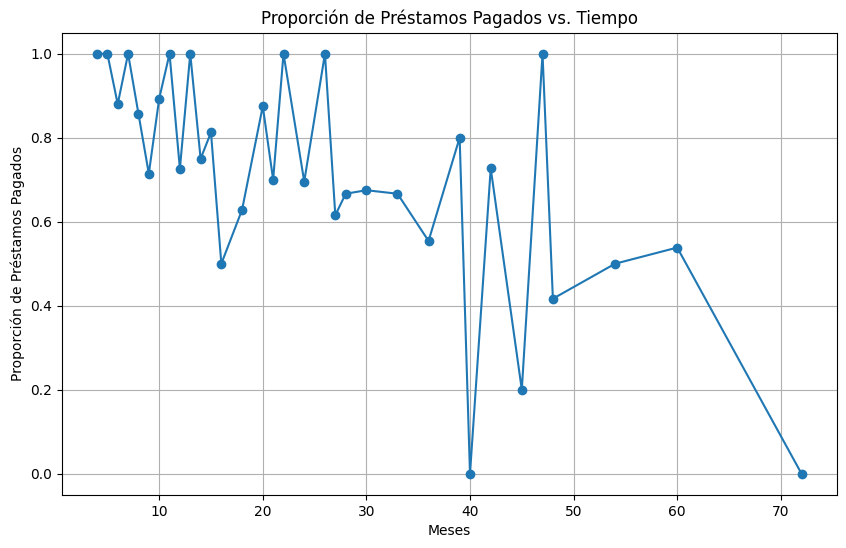

In [163]:
# Calcular la proporción de préstamos pagados por mes
riesgo_pago_total= banco.groupby("meses")["credito_pagado"].mean()

# Graficamos la proporción de préstamos pagados en función del tiempo
plt.figure(figsize=(10, 6))
plt.plot(riesgo_pago_total.index, riesgo_pago_total.values, marker='o', linestyle='-')
plt.xlabel("Meses")
plt.ylabel("Proporción de Préstamos Pagados")
plt.title("Proporción de Préstamos Pagados vs. Tiempo")
plt.grid(True)
plt.show()

#1. Riesgo Constante: Si la tasa de préstamos pagados se mantiene constante a lo largo del tiempo, se vera una línea horizontal en el gráfico.
#2. Riesgo Creciente: Si la tasa de préstamos pagados aumenta a medida que transcurre el tiempo, se vera una tendencia ascendente.
#3. Riesgo Decreciente: Si la tasa de préstamos pagados disminuye a medida que transcurre el tiempo, se vera una tendencia descendente.
#4. Distribución Log-Normal: Si la tasa de préstamos pagados sigue una distribución log-normal, no se vera si es creciente o decreciente

Vemos que la relacion de supervivencia, es decir que el prestamo se pague es su totalidad es de distribucion log-Normal, ya que no hay una tendencia en especifico. Si queremos saber mejor el riesgo de que los prestamos se paguen en su totalidad hay que tomar mas variables para ir segmentando a cada tipo de cliente.

####4. Modelo Cox

##### a) Elige cuatro variables adicionales además de "tasa de interés" y "cantidad" que creas que afectan el riesgo del evento.

Segun experiencia y conocimiento de la carrera vamos a tomar las siguientes variables:

1. Historial crediticio del cliente en dummies
2. Credito pagado
3. Cantidad
4. Numero de creditos
5. Edad del cliente
6. Dependientes economicos

##### b) Indica si cada una de las seis variables elegidas aumenta o disminuye el riesgo del evento y por qué:

Aqui explicare porque pienso que esas variables afectan en el riesgo:

1. Tasa de interés: Aumenta el riesgo. Un mayor interés significa que el cliente tendrá que pagar más en intereses, lo que podría dificultar el pago total del préstamo.

2. Historial crediticio del cliente en dummies: Es probable que los clientes con un historial crediticio positivo tengan menos riesgo de no pagar el préstamo.

3. Credito pagado: 1 si pago el credito por completo, 0 si no ha pagado el credito por completo

4. Cantidad: la cantidad del prestamo disminuye el riesgo ya que entre mas cantidad que deba mas se apresura el clinte en pagar el prestamo

5. Numero de creditos: disminuye el riesgo ya que mientras mas numero mas preocupado estara el cliente en pagarla antes

6. Edad del cliente: La edad del cliente puede ser un factor importante. Los clientes más jóvenes o más mayores pueden tener diferentes comportamientos de pago.

7. Dependientes economicos: Puede ser un factor para el riesgo, ya que mientras mas personas dependan de ese cliente, mas responsabilidades tendra por cubrir y la capacidad de pago podria ser menor, por lo que el riesgo podria aumentar.

In [177]:
banco.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

In [178]:
dummies=pd.get_dummies(banco['historia_crediticia'], prefix='historia_crediticia').astype(int)

In [179]:
dummies.describe()

,historia_crediticia_no_ha_pagado,historia_crediticia_pago_algun_credito,historia_crediticia_pago_retrasado,historia_crediticia_pago_todos,historia_crediticia_sin_creditos
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.293000,0.530000,0.088000,0.049000,0.040000
std,0.455366,0.499349,0.283437,0.215976,0.196057
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
#solo nos quedamos con 2 dummies
dummies=dummies[['historia_crediticia_pago_todos','historia_crediticia_pago_retrasado']]

In [181]:
#unimos dummies con df_empleados

banco=pd.concat([banco,dummies],axis=1)
banco=banco.drop('historia_crediticia',axis=1)

In [184]:
df= pd.DataFrame(banco)
df= df[['meses','credito_pagado','tasa_de_interes','cantidad','numero_creditos','edad','historia_crediticia_pago_todos','historia_crediticia_pago_retrasado','dependientes_economicos']]
df

,meses,credito_pagado,tasa_de_interes,cantidad,numero_creditos,edad,historia_crediticia_pago_todos,historia_crediticia_pago_retrasado,dependientes_economicos
0,6,1,4,1169,2,67,0,0,1
1,48,0,2,5951,1,22,0,0,1
2,12,1,2,2096,1,49,0,0,2
3,42,1,2,7882,1,45,0,0,2
4,24,0,3,4870,2,53,0,1,2
...,...,...,...,...,...,...,...,...,...
995,12,1,3,1736,1,31,0,0,1
996,30,1,4,3857,1,40,0,0,1
997,12,1,4,804,1,38,0,0,1
998,45,0,4,1845,1,23,0,0,1


In [186]:
cph = CoxPHFitter().fit(df,'meses','credito_pagado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4048.63
         time fit was run = 2023-10-08 01:22:36 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
tasa_de_interes                     -0.43       0.65       0.04            -0.50            -0.36                 0.61                 0.70
cantidad                            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
numero_creditos                      0.13       1.14       0.07            -0.00             0.26                 1.00                 1.30
edad                                 0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
historia_crediticia_pago_todos      -0.74       0.48       0.22            -1.18            -0.31                 0.31                 0.74
historia_crediticia_pago_retrasado  -0.31       0.73       0.14            -0.58            -0.04                 0.56                 0.96
dependientes_economicos              0.00       1.00       0.11            -0.20             0.21                 0.82                 1.23

                                     cmp to      z      p   -log2(p)
covariate                                                           
tasa_de_interes                        0.00 -11.58 <0.005     100.67
cantidad                               0.00 -16.30 <0.005     196.13
numero_creditos                        0.00   1.90   0.06       4.14
edad                                   0.00   4.35 <0.005      16.16
historia_crediticia_pago_todos         0.00  -3.34 <0.005      10.20
historia_crediticia_pago_retrasado     0.00  -2.26   0.02       5.40
dependientes_economicos                0.00   0.03   0.98       0.03
---
Concordance = 0.78
Partial AIC = 8111.26
log-likelihood ratio test = 441.51 on 7 df
-log2(p) of ll-ratio test = 300.73

1. tasa de interes: Disminuye en un 35% el riesgo, por lo que al tener menos tasa de interes, mas probabilidad de pagar el credito

2. cantidad: disminuye un 1% el riesgo al prestamo hacia los clientes, mientras menos cantidad mas probable da dar el prestamo

3. numero de creditos: NO afecta significavemente al prestamo hacia los clientes en un 14%

4. Edad: afecta significativamente un 1% al prestamo hacia los clientes, mientras mas edad mas probabilidad de dar el prestamo, aumenta el riesgo de no pago al ser de menor edad

5. Historial crediticio (paga todo): Disminuye el riesgo en un 53%, por lo que tener cliente con un buen historial crediticio, sin retrasos ni adeudos es mejor

6. Historial crediticio (retraso): No afecta al prestamo de los clientes, pero tiene un riesgo de no pago de el 73%

7. Dependientes economicos: No afecta significativamente hacia el prestamo hacia los clientes

#### 5.-Con  base  en  los  cálculos  realizados,  redacta  un  comentariointegralde  por  lo menos  250 palabras que  resuma  el  análisis,  reflexiones  y  recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión.

El análisis integral de las políticas de otorgamiento de préstamos del Banco de la Ilusión (BIL) arrojó resultados reveladores que deben ser considerados con atención para mejorar la eficacia y la gestión del riesgo crediticio en la institución financiera. Estos resultados se basaron en la evaluación de varios factores que inciden en la probabilidad de que los clientes paguen sus préstamos de manera oportuna y completa.

En primer lugar, se identificó que la tasa de interés juega un papel crítico en la toma de decisiones de préstamos. Una disminución en la tasa de interés se traduce en una menor probabilidad de incumplimiento por parte de los clientes. Esto sugiere que ofrecer tasas de interés más bajas podría atraer a prestatarios más confiables y disminuir el riesgo de crédito para el banco. Sin embargo, esta estrategia debe equilibrarse con la necesidad de mantener márgenes de beneficio adecuados.

En segundo lugar, la cantidad del préstamo también se mostró como un factor importante. Reducir la cantidad prestada en un 1% disminuye el riesgo en un margen similar. Esto sugiere que limitar el monto de los préstamos podría ser una estrategia efectiva para mitigar el riesgo crediticio.

La edad de los solicitantes de préstamos también resultó relevante, ya que un aumento del 1% en la edad se correlacionó con una mayor probabilidad de que los clientes cumplan con sus obligaciones crediticias. Esto implica que otorgar préstamos a clientes más jóvenes con lleva un mayor riesgo de incumplimiento, lo que indica que el banco debe considerar políticas de edad mínima para los prestatarios.

El historial crediticio fue uno de los factores más destacados en el análisis. Un historial crediticio positivo, donde los clientes pagan todas sus deudas puntualmente, reduce el riesgo en un impresionante 53%. Esto subraya la importancia de evaluar cuidadosamente el historial crediticio de los solicitantes antes de aprobar un préstamo.

Por otro lado, el historial crediticio con retrasos, aunque no afecta significativamente la aprobación del préstamo, se asocia con un riesgo de no pago del 73%. Esto indica que los retrasos pasados pueden ser indicativos de problemas futuros en el pago de deudas.

En cuanto al número de dependientes económicos, no se observó un impacto significativo en el riesgo crediticio. Esto sugiere que el número de personas a cargo de un cliente no es un factor crítico en la toma de decisiones crediticias.


 En resumen, el análisis integral proporciona una hoja de ruta clara para la revisión de las políticas de otorgamiento de préstamos del Banco de la Ilusión. Se recomienda la implementación de tasas de interés competitivas, la consideración de la cantidad del préstamo y la edad del prestatario, así como una atención especial al historial crediticio. Además, el banco debe prestar atención a los clientes con historiales de retrasos y desarrollar estrategias para mitigar el riesgo. Además, se podría considerar establecer límites de edad mínima para prestatarios. Estas medidas pueden ayudar al BIL a tomar decisiones de préstamos más informadas y reducir su riesgo crediticio en el futuro.